# Homework excercises for the Python Fundementals module

These excercises will help you practice and expand your knowledge. 

I'll ask you to work through them as we get through certain segments

# Part 1
## Calculate the max inflammation for each patient over all days

What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left) or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis:

![](https://swcarpentry.github.io/python-novice-inflammation/fig/python-operations-across-axes.png)

To support this functionality, most array functions allow us to specify the axis we want to work on.

Read the documentation for `numpy.max()` (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html) then calculate maximum inflammation for each patient over all days and save it to a variable `patient_max`

start by importing numpy so you can use that. in a separate cell load in the data, then in the next cell do your calculation

In [43]:
# import numpy
import numpy as np
import glob
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# load in data (make sure the path of file is correct!)

data = np.loadtxt('../data/inflammation-01.csv', delimiter=',')
data.shape



(60, 40)

In [3]:
# calc all patient max & print out here:
patient_max = np.max(data, axis = 1)
print(patient_max)


##Loop version
#def hw1(data):

    # patient_max = []
    # for row in data:
        # max_value = max(row)
        # patient_max.append(max_value)
    
    # return patient_max

# patient_max = hw1(data)
# print(patient_max)


[18. 18. 19. 17. 17. 18. 17. 20. 17. 18. 18. 18. 17. 16. 17. 18. 19. 19.
 17. 19. 19. 16. 17. 15. 17. 17. 18. 17. 20. 17. 16. 19. 15. 15. 19. 17.
 16. 17. 19. 16. 18. 19. 16. 19. 18. 16. 19. 15. 16. 18. 14. 20. 17. 15.
 17. 16. 17. 19. 18. 18.]


next calculate the average inflammation per day averaged across all patients: call it `daily_avg` 

In [4]:
# calc daily_avg here:
daily_avg = np.mean(data, axis = 1)
print(daily_avg)

##Loop Version
# def hw1(data):

#     daily_avg = []
#     for column in data:
#         avg_value = np.mean(column)
#         daily_avg.append(avg_value)
    
#     return daily_avg

# daily_avg = hw1(data)
# print(daily_avg)

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


## what is the maximum of the daily average inflammation? 



In [5]:
# answer here
np.max(daily_avg)

7.225

## plot all datasets on one figure

use what you know about `for` loops, `glob`, `matplotlib` and `numpy` to plot the mean inflammation for all patents over time FOR EACH DATASET on the same figure. 

There should be a line on your figure plotted for each datast. 

['../data/inflammation-01.csv', '../data/inflammation-02.csv', '../data/inflammation-03.csv', '../data/inflammation-04.csv', '../data/inflammation-05.csv', '../data/inflammation-06.csv', '../data/inflammation-07.csv', '../data/inflammation-08.csv', '../data/inflammation-09.csv', '../data/inflammation-10.csv', '../data/inflammation-11.csv', '../data/inflammation-12.csv']


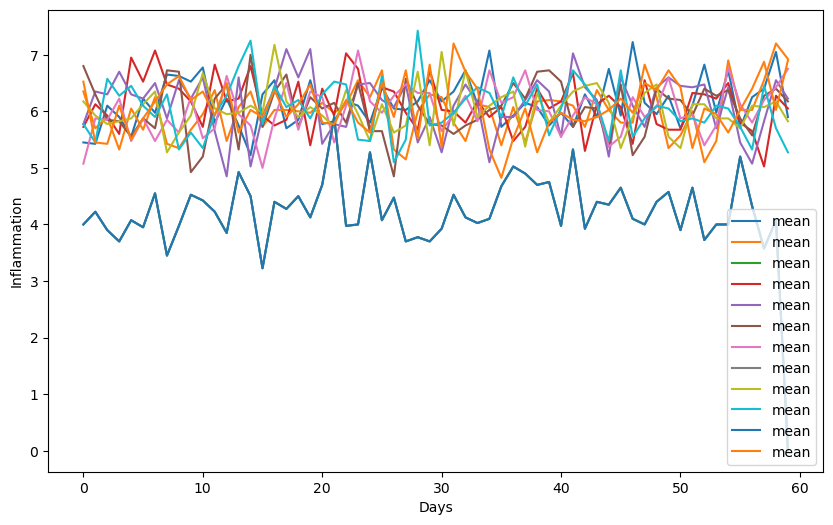

In [6]:
# answer here
import glob


def analyze(filenames):
    data = np.loadtxt(filenames, delimiter=',')
    
    ax.plot(np.mean(data, axis = 1),label = 'mean')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
  
ax.set_ylabel('Inflammation')
ax.set_xlabel('Days')
    
filenames = sorted(glob.glob('../data/inflammation*.csv'))
print (filenames)
    

#create a 'for' loop that prints the filename, and plots the mean for each :

for f in filenames[0:12]:
    analyze(f)

ax.legend()
plt.show()

# Part 2
## creating functions

Write a function that takes two arguments (feet and inches) and returns height in meters
Verify it gives sensible answers

In [25]:
# answer here
# def feet_to_inches(F) :
#     return(F * 12)
# def inches_to_meters(I) :
#     return(I / 39.37)
# def feet_and_inches_to_meters(M):
#     F = feet_to_inches(M)
#     T = inches_to_meters(F)
#     return T
# print (feet_and_inches_to_meters(3))

def feet_and_inches_to_m(feet, inches) :
    inches = feet * 12 + inches
    meters = inches / 39.37
    return meters


In [26]:
# use the fuction
feet = 7
inches = 9

height_in_meters = feet_and_inches_to_m(feet, inches)
print (height_in_meters)



2.362204724409449


# Part 3
## Work with real ARGO ocean profile data

Argo floats (https://argo.ucsd.edu/) are profiling drifters that have revolutionized ocean observing

#### read through the "Real Data" section of Abernathy: https://earth-env-data-science.github.io/lectures/basic_scipy/numpy_and_matplotlib.html#real-data


### Analyze ARGO Data
In this problem, we use real data from ocean profiling floats.


1. Load the data file (argo_float_4901412.npz ) using `numpy.load()` and save it to a variable called `data`. This loads the data as a `dictionary` (remember those?) where the `keys` are the name of a ARGO observation, and the `values` are the data for that variable

1. use `list(data.keys())` to see the `key` labels for the data 

1. Extract the temperature, pressure and salinity arrays to variables called T, S, P 

1. Extract the date, lat, lon, and level arrays. 

1. Note the shapes of T, S and P compared to these (date, lat, lon, and level) arrays. How do they line up?

1. Make a plot for the first column of data in T, S and P (three plots). The vertical scale should be the levels data.  Make sure you label the axes on each plot. Flip the veritcal axis direction so that levels increase downward on the plot using `plt.ylim([80, 0])`. change that to `plt.ylim([ 0, 80])` and note what happens.

1. The data consist of a series of temperature and salinity profiles. How many profiles are there? Make a plot of all of them using `plt.pcolormesh()`. Check out the documentation for pcolormesh: https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.pcolormesh.html . use your date data for the x axis, levels for the y axis, and T or S to be the data that is represented in color. Add a `colorbar()`

1. Compute the mean of each of T, and S at each level. When you look at the `pcolormesh` image from the excercise above, you will see some white areas in the data. These are places with no, or bad data for some reason. They are filled with a data type called `NaN`, short for 'not-a-number'. `NaN` has a property that any math operation on it changes the output to `NaN`, for example 4+ `NaN` = `NaN`. When we take the mean in this excercise I want you to use a variation on `numpy.mean()` called `numpy.nanmean()` which still takes the average, but ignore `NaN` values in the mean.

1. Now make two plots: show only the mean T and S at each depth. extra credit: Show error bars on each plot using the standard deviations. Again, make sure you label the axes and put a title on each plot.

1. Create a scatter plot of the positions of the ARGO float data. Color the positions by the date. Add a grid overlay using `plt.grid()`. check out the documentation for `scatter()`: https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html

Don’t forget to label the axes!

In [110]:
# 1 load ARGO data file and 
import xarray as xr

# 2 examine keys

argo = np.load('../data/argo_float_4901412.npz')
keys = list(data.keys())
print(keys)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


In [111]:
#3, 4 extract the data into named variable arrays 
# 5 print the shapes of a T, S, P and date, lat, lon, level

S = argo['S']
T = argo['T']
P = argo['P']
levels = argo['levels']
lat = argo['lat']
lon = argo['lon']
date = argo['date']

# %whos

for key in argo: 
    print(key, 'shape is: ', argo[key].shape)
    

S shape is:  (78, 75)
T shape is:  (78, 75)
levels shape is:  (78,)
lon shape is:  (75,)
date shape is:  (75,)
P shape is:  (78, 75)
lat shape is:  (75,)


<xarray.DataArray (level: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...

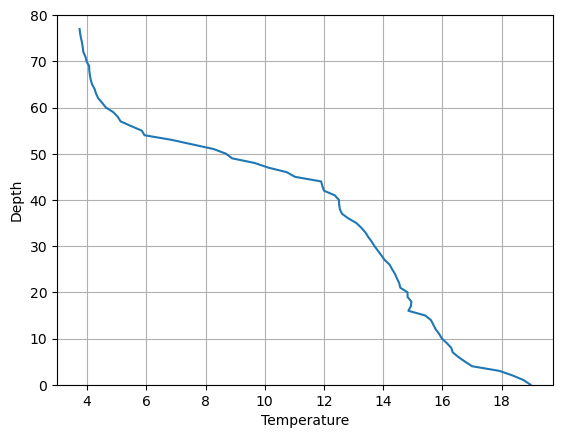

In [109]:
# 6  plot the first column of T, S, P vs levels
da_salinity = xr.DataArray(S, dims=['level', 'date'], coords={'level': levels, 'date': date})
da_salinity

da_temperature = xr.DataArray(T, dims=['level', 'date'], coords={'level': levels, 'date': date})
da_temperature

da_pressure = xr.DataArray(P, dims=['level', 'date'], coords={'level': levels, 'date': date})
da_temperature


plt.plot(T[:,0], levels, label = 'T')
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.ylim([0,80])
plt.grid()



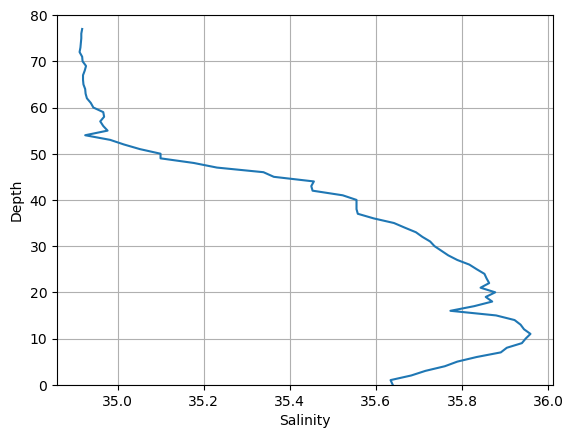

In [47]:
plt.plot(S[:,0], levels, label = 'S')
plt.xlabel('Salinity')
plt.ylabel('Depth')
plt.ylim([0,80])
plt.grid()

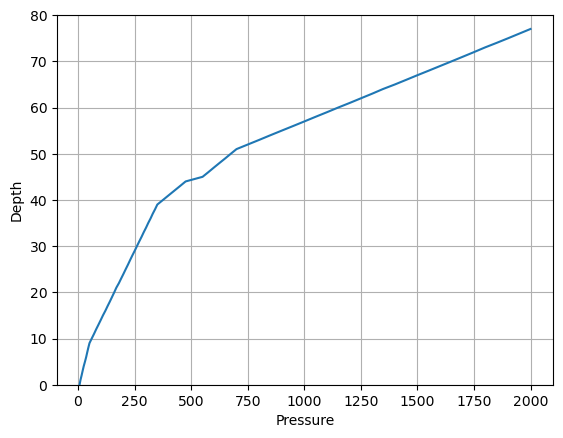

In [48]:
plt.plot(P[:,0], levels, label = 'P')
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.ylim([0,80])
plt.grid()

Text(0, 0.5, 'Depth')

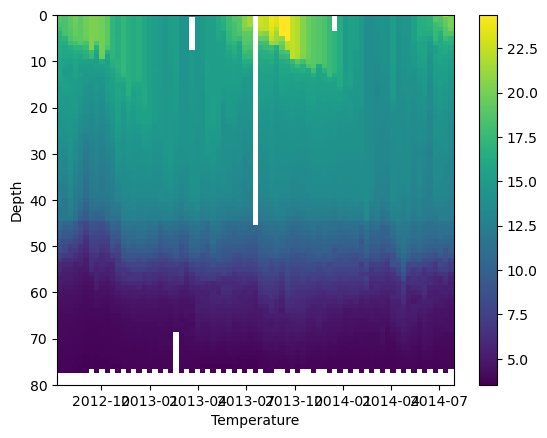

In [59]:
plt.figure()
plt.pcolormesh(date, levels, T,)
plt.ylim([80,0])
# add a colorbar
plt.colorbar()

plt.xlabel('Temperature')
plt.ylabel('Depth')

Text(0, 0.5, 'Depth')

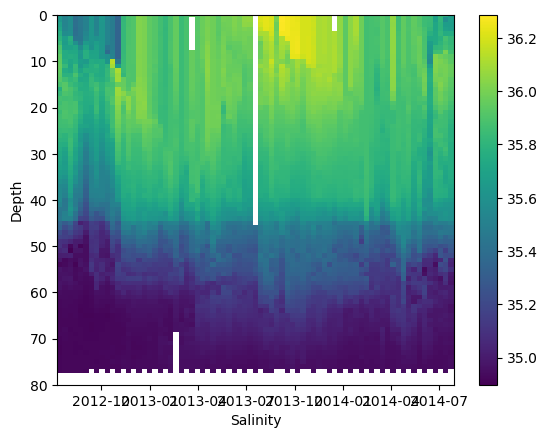

In [60]:
#7  use pcolormesh to plot the series of T and S profiles as a color panel
# flip the yaxis direction the same way as you did above

plt.figure()
plt.pcolormesh(date, levels, S,)
plt.ylim([80,0])

# add a colorbar

plt.colorbar()

plt.xlabel('Salinity')
plt.ylabel('Depth')

In [93]:
#8 get the mean of T and S at each depth level
temperature_mean = np.nanmean(T, axis = 1)
print(temperature_mean)

salinity_mean = np.nanmean(S, axis = 1)
print(salinity_mean)


[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
[35.9063218  35.90223138 35.90313435 35.90173139 35.90

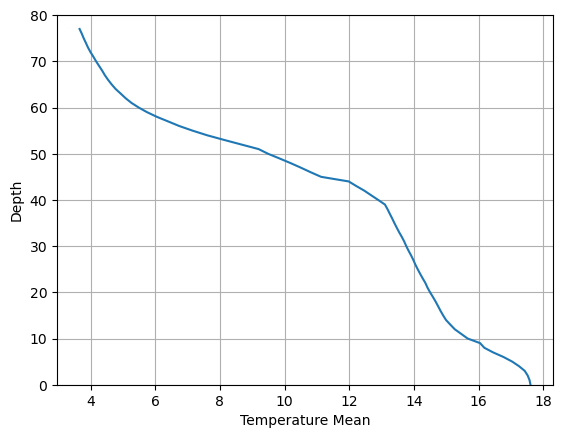

In [97]:
#9 plot the mean temp and salinity vs levels (depth)
plt.plot(temperature_mean, levels, label = 'T')
plt.xlabel('Temperature Mean')
plt.ylabel('Depth')
plt.ylim([0,80])
plt.grid()

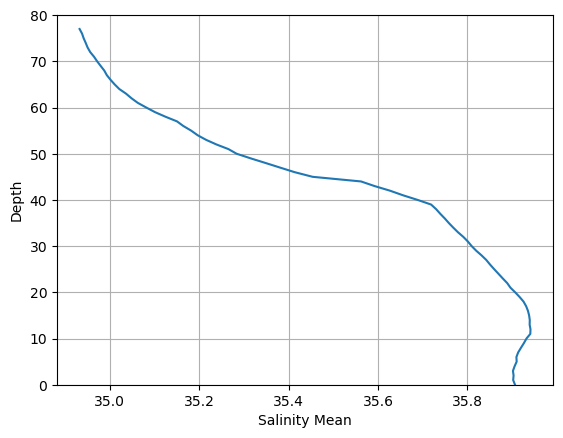

In [96]:
plt.plot(salinity_mean, levels, label = 'S')
plt.xlabel('Salinity Mean')
plt.ylabel('Depth')
plt.ylim([0,80])
plt.grid()

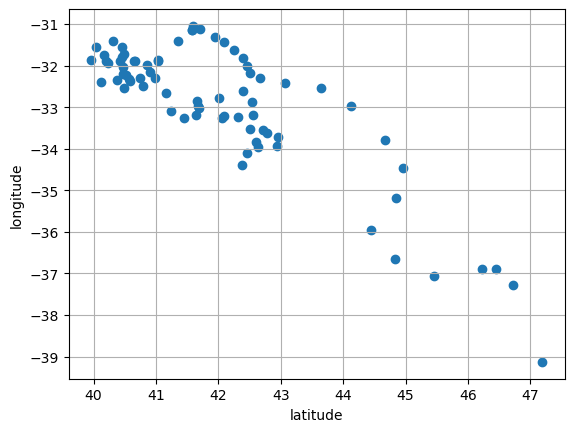

In [114]:
# 10  make a scatter plot of the lat and lon
plt.scatter(lat, lon)
plt.xlabel('latitude')
plt.ylabel('longitude')
#plt.ylim([30,55])
plt.grid()